In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import fsolve

In [51]:
data = pd.read_excel("APM466A1_data.xlsx")

F = 1000

# filter the 11 chosen bonds for 0-5 year yeild curve
chosen = ["CA135087K940", "CA135087L518", "CA135087L930", "CA135087M847", "CA135087N837", "CA135087P576",
          "CA135087Q491", "CA135087Q988", "CA135087R895", "CA135087S471"]
dt = data[data['ISIN'].isin(chosen)]

# calculate the clean price
tendays = ["1/6/2025", "1/7/2025", "1/8/2025", "1/9/2025", "1/10/2025", 
         "1/13/2025", "1/14/2025", "1/15/2025", "1/16/2025", "1/17/2025"]
for date in tendays:
    dt[date] = (dt[date] / 100) * F
    
# calculate the coupon payment
dt['coupayment'] = (dt['coupon']/100)*1000

# record the year to maturity for each bond
years_left = {
    "CA135087K940": 0.5,
    "CA135087L518": 1,
    "CA135087L930": 1.5,
    "CA135087M847": 2,
    "CA135087N837": 2.5,
    "CA135087P576": 3,
    "CA135087Q491": 3.5,
    "CA135087Q988": 4,
    "CA135087R895": 4.5,
    "CA135087S471": 5
}

dt['year_left'] = dt['ISIN'].map(years_left)

C:\Users\amyc0\AppData\Local\Temp\ipykernel_34948\1270513516.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[date] = (dt[date] / 100) * F
C:\Users\amyc0\AppData\Local\Temp\ipykernel_34948\1270513516.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['coupayment'] = (dt['coupon']/100)*1000
C:\Users\amyc0\AppData\Local\Temp\ipykernel_34948\1270513516.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [4]:
dt

,ISIN,coupon,issue date,maturity date,1/6/2025,1/7/2025,1/8/2025,1/9/2025,1/10/2025,1/13/2025,1/14/2025,1/15/2025,1/16/2025,1/17/2025,coupayment,year_left
8,CA135087K940,0.50,4/3/2020,9/1/2025,984.0,984.1,984.0,984.2,983.7,983.6,983.6,984.0,984.7,985.0,5.0,0.5
9,CA135087M847,1.25,10/15/2021,3/1/2027,966.2,965.9,965.8,966.3,963.9,962.8,961.9,963.6,966.0,966.4,12.5,2.0
15,CA135087N837,2.75,5/13/2022,9/1/2027,996.3,995.6,995.4,995.8,992.7,991.3,990.2,992.0,995.0,995.3,27.5,2.5
18,CA135087L518,0.25,10/9/2020,3/1/2026,969.9,969.7,969.7,970.0,969.0,969.1,968.0,969.0,970.1,970.6,2.5,1.0
23,CA135087L930,1.00,4/16/2021,9/1/2026,970.1,969.9,970.0,970.3,968.6,967.7,967.1,968.5,970.3,970.7,10.0,1.5
30,CA135087P576,3.50,10/21/2022,3/1/2028,1018.2,1018.2,1017.0,1017.2,1015.2,1012.6,1010.2,1012.4,1015.8,1016.5,35.0,3.0
31,CA135087Q491,3.25,4/21/2023,9/1/2028,1011.0,1011.4,1009.9,1009.4,1007.9,1004.9,1001.9,1004.2,1009.2,1010.2,32.5,3.5
33,CA135087Q988,4.00,10/13/2023,3/1/2029,1040.7,1040.1,1039.0,1038.7,1035.3,1032.9,1029.9,1032.4,1038.0,1039.0,40.0,4.0
36,CA135087R895,3.50,4/8/2024,9/1/2029,1022.2,1021.4,1020.4,1019.8,1015.9,1012.8,1010.0,1012.7,1018.5,1019.7,35.0,4.5
38,CA135087S471,2.75,10/3/2024,3/1/2030,988.1,986.0,985.3,985.4,979.6,976.1,973.8,977.6,984.0,984.7,27.5,5.0


In [52]:
# dirty price
dates = [datetime.strptime(date, '%m/%d/%Y') for date in tendays]

# last coupon payment date for the bonds
lastcp = datetime.strptime('9/1/2024', '%m/%d/%Y')

# dirty prices for 1/6/2025
n1 = (dates[0]-lastcp).days
dt["1/6/2025"] = dt["1/6/2025"] + dt.apply(lambda row: (n1 / 365) * (row["coupon"] / 2), axis=1)

# dirty prices for 1/7/2025
n2 = (dates[1]-lastcp).days
dt["1/7/2025"] = dt["1/7/2025"] + dt.apply(lambda row: (n2 / 365) * (row["coupon"] / 2), axis=1)

# dirty prices for 1/8/2025
n3 = (dates[2]-lastcp).days
dt["1/8/2025"] = dt["1/8/2025"] + dt.apply(lambda row: (n3 / 365) * (row["coupon"] / 2), axis=1)

# dirty prices for 1/9/2025
n4 = (dates[3]-lastcp).days
dt["1/9/2025"] = dt["1/9/2025"] + dt.apply(lambda row: (n4 / 365) * (row["coupon"] / 2), axis=1)

# dirty prices for 1/10/2025
n5 = (dates[4]-lastcp).days
dt["1/10/2025"] = dt["1/10/2025"] + dt.apply(lambda row: (n5 / 365) * (row["coupon"] / 2), axis=1)

# dirty prices for 1/13/2025
n6 = (dates[5]-lastcp).days
dt["1/13/2025"] = dt["1/13/2025"] + dt.apply(lambda row: (n6 / 365) * (row["coupon"] / 2), axis=1)

# dirty prices for 1/14/2025
n7 = (dates[6]-lastcp).days
dt["1/14/2025"] = dt["1/14/2025"] + dt.apply(lambda row: (n7 / 365) * (row["coupon"] / 2), axis=1)

# dirty prices for 1/15/2025
n8 = (dates[7]-lastcp).days
dt["1/15/2025"] = dt["1/15/2025"] + dt.apply(lambda row: (n8 / 365) * (row["coupon"] / 2), axis=1)

# dirty prices for 1/16/2025
n9 = (dates[8]-lastcp).days
dt["1/16/2025"] = dt["1/16/2025"] + dt.apply(lambda row: (n9 / 365) * (row["coupon"] / 2), axis=1)

# dirty prices for 1/17/2025
n10 = (dates[9]-lastcp).days
dt["1/17/2025"] = dt["1/17/2025"] + dt.apply(lambda row: (n10 / 365) * (row["coupon"] / 2), axis=1)


C:\Users\amyc0\AppData\Local\Temp\ipykernel_34948\39386766.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["1/6/2025"] = dt["1/6/2025"] + dt.apply(lambda row: (n1 / 365) * (row["coupon"] / 2), axis=1)
C:\Users\amyc0\AppData\Local\Temp\ipykernel_34948\39386766.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["1/7/2025"] = dt["1/7/2025"] + dt.apply(lambda row: (n2 / 365) * (row["coupon"] / 2), axis=1)
C:\Users\amyc0\AppData\Local\Temp\ipykernel_34948\39386766.py:17: SettingWithCopyWarning: 
A va

In [53]:
# Define the ytm equation
def bond_price(ytm, P, F, C, N):
    return sum([(C / 2) / (1 + ytm / 2) ** t for t in range(1, N + 1)]) + F / (1 + ytm / 2) ** N

# Solve for YTM using Newton Method
def solve_ytm(P, F, C, N, tol=1e-6, max_iter=100):
    ytm_guess = 0.05
    for _ in range(max_iter):
        # Compute bond price using current YTM guess
        p_ytm_guess = bond_price(ytm_guess, P, F, C, N)
        
        # Compute derivative (slope) for Newton-Raphson update
        derivative = sum([-t * (C / 2) / (1 + ytm_guess / 2) ** (t + 1) for t in range(1, N + 1)])
        derivative += -N * F / (1 + ytm_guess / 2) ** (N + 1)
        
        # Ensure denominator is not zero (avoid division by zero)
        if derivative == 0:
            return None  # Convergence issue
        
        # Update YTM guess
        ytm_new = ytm_guess - (p_ytm_guess - P) / derivative
        
        # Check for convergence
        if abs(ytm_new - ytm_guess) < tol:
            return ytm_new * 100  # Convert to percentage
        
        ytm_guess = ytm_new
    
    return ytm_guess * 100 

In [54]:
ytm_dt = pd.DataFrame(columns=tendays)

dt["N"] = dt["year_left"] * 2
dt["N"] = dt["N"].astype(int)
dt.sort_values('N', inplace=True)

for date in tendays:
    ytm_dt[date] = dt.apply(
        lambda row: solve_ytm(row[date], F, row["coupayment"],row["N"]), axis=1)


C:\Users\amyc0\AppData\Local\Temp\ipykernel_34948\4229792265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["N"] = dt["year_left"] * 2
C:\Users\amyc0\AppData\Local\Temp\ipykernel_34948\4229792265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["N"] = dt["N"].astype(int)
C:\Users\amyc0\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

In [55]:
# add year until maturity column to the data frame
ytm_dt["maturity"] = [i * 0.5 for i in range(1, len(ytm_dt) + 1)]
ytm_dt.set_index("maturity", inplace=True)

In [56]:
ytm_dt

,1/6/2025,1/7/2025,1/8/2025,1/9/2025,1/10/2025,1/13/2025,1/14/2025,1/15/2025,1/16/2025,1/17/2025
maturity,,,,,,,,,,
0.5,3.742227,3.721385,3.741944,3.700406,3.803786,3.824078,3.823936,3.740951,3.595997,3.533857
1.0,3.331044,3.351987,3.351951,3.320400,3.425355,3.414745,3.530314,3.425175,3.309663,3.257224
1.5,3.042387,3.056314,3.049206,3.028080,3.147271,3.210247,3.252371,3.153815,3.027408,2.999285
2.0,2.992459,3.008275,3.013488,2.986886,3.114205,3.172461,3.220320,3.129704,3.002155,2.980860
2.5,2.884552,2.913687,2.921903,2.905000,3.034835,3.093228,3.139394,3.063465,2.937395,2.924671
3.0,2.841555,2.841389,2.882797,2.875697,2.944934,3.034903,3.118492,3.041539,2.923098,2.898639
3.5,2.900177,2.888027,2.932982,2.947895,2.992955,3.083177,3.173987,3.104099,2.952978,2.922753
4.0,2.896584,2.912064,2.940591,2.948273,3.037000,3.099506,3.178275,3.112352,2.965541,2.939305
4.5,2.955016,2.973779,2.997285,3.011357,3.103679,3.177105,3.243894,3.179260,3.041328,3.012815


In [58]:
dt

,ISIN,coupon,issue date,maturity date,1/6/2025,1/7/2025,1/8/2025,1/9/2025,1/10/2025,1/13/2025,1/14/2025,1/15/2025,1/16/2025,1/17/2025,coupayment,year_left,N
8,CA135087K940,0.50,4/3/2020,9/1/2025,984.086986,984.187671,984.088356,984.289041,983.789726,983.691781,983.692466,984.093151,984.793836,985.094521,5.0,0.5,1
18,CA135087L518,0.25,10/9/2020,3/1/2026,969.943493,969.743836,969.744178,970.044521,969.044863,969.145890,968.046233,969.046575,970.146918,970.647260,2.5,1.0,2
23,CA135087L930,1.00,4/16/2021,9/1/2026,970.273973,970.075342,970.176712,970.478082,968.779452,967.883562,967.284932,968.686301,970.487671,970.889041,10.0,1.5,3
9,CA135087M847,1.25,10/15/2021,3/1/2027,966.417466,966.119178,966.020890,966.522603,964.124315,963.029452,962.131164,963.832877,966.234589,966.636301,12.5,2.0,4
15,CA135087N837,2.75,5/13/2022,9/1/2027,996.778425,996.082192,995.885959,996.289726,993.193493,991.804795,990.708562,992.512329,995.516096,995.819863,27.5,2.5,5
30,CA135087P576,3.50,10/21/2022,3/1/2028,1018.808904,1018.813699,1017.618493,1017.823288,1015.828082,1013.242466,1010.847260,1013.052055,1016.456849,1017.161644,35.0,3.0,6
31,CA135087Q491,3.25,4/21/2023,9/1/2028,1011.565411,1011.969863,1010.474315,1009.978767,1008.483219,1005.496575,1002.501027,1004.805479,1009.809932,1010.814384,32.5,3.5,7
33,CA135087Q988,4.00,10/13/2023,3/1/2029,1041.395890,1040.801370,1039.706849,1039.412329,1036.017808,1033.634247,1030.639726,1033.145205,1038.750685,1039.756164,40.0,4.0,8
36,CA135087R895,3.50,4/8/2024,9/1/2029,1022.808904,1022.013699,1021.018493,1020.423288,1016.528082,1013.442466,1010.647260,1013.352055,1019.156849,1020.361644,35.0,4.5,9
38,CA135087S471,2.75,10/3/2024,3/1/2030,988.578425,986.482192,985.785959,985.889726,980.093493,976.604795,974.308562,978.112329,984.516096,985.219863,27.5,5.0,10


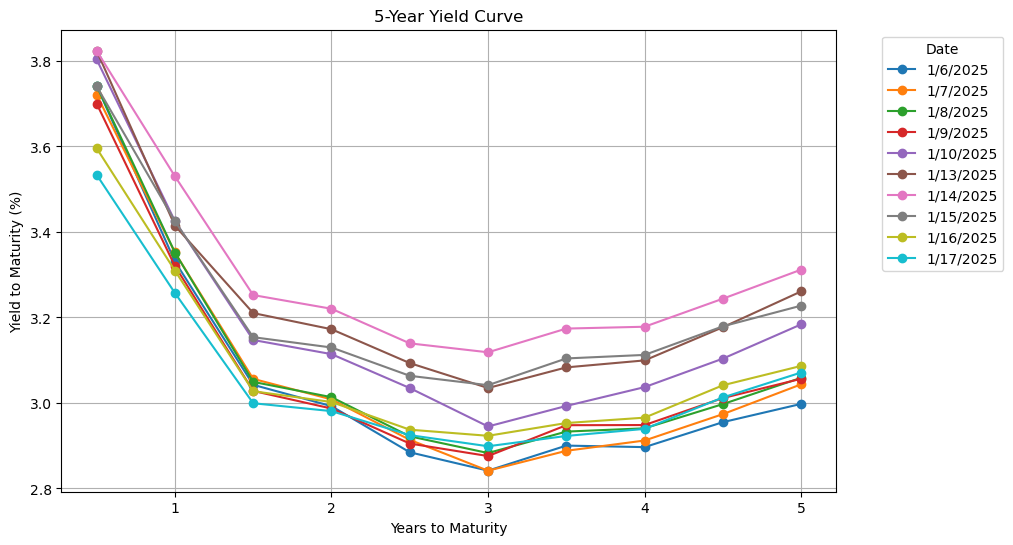

In [143]:
# plot the ytm curves
plt.figure(figsize=(10, 6))

for date in ytm_dt.columns:
    plt.plot(ytm_dt.index, ytm_dt[date], marker='o', linestyle='-', label=date)

# Labels and Title
plt.xlabel("Years to Maturity")
plt.ylabel("Yield to Maturity (%)")
plt.title("5-Year Yield Curve")
plt.legend(title="Date", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#plt.savefig("4a.png", dpi=300, bbox_inches='tight') 
# Show the plot
plt.show()

In [94]:
# spot rate data
spot_rate_dt = pd.DataFrame(columns=tendays)
spot_rate_dt["year to maturity"] = [i * 0.5 for i in range(1, len(ytm_dt) + 1)]
spot_rate_dt.set_index("year to maturity", inplace=True)

spdata = [spdt1, spdt2, spdt3, spdt4, spdt5, spdt6, spdt7, spdt8, spdt9, spdt10]

# calculated spot rates
spdt1 = [3.71, 3.3, 3.01, 2.97, 2.857, 2.81, 2.87, 2.87, 2.93, 2.98]
spdt2 = [3.69, 3.32, 3.03, 2.98, 2.89, 2.81, 2.86, 2.89, 2.95, 3.26]
spdt3 = [3.7, 3.32, 3.02, 2.99, 2.89, 2.85, 2.91, 2.91, 2.98, 3.04]
spdt4 = [3.67, 3.29, 3, 2.96, 2.88, 2.85, 2.92, 2.92, 2.99, 3.04]
spdt5 = [3.77, 3.4, 3.12, 3.09, 3.01, 2.91, 2.96, 3.01, 3.08, 3.17]
spdt6 = [3.79, 3.39, 3.18, 3.15, 3.06, 3, 3.06, 3.07, 3.15, 3.24]
spdt7 = [3.79, 3.5, 3.22, 3.19, 3.11, 3.09, 3.15, 3.15, 3.22, 3.29]
spdt8 = [3.71, 3.4, 3.13, 3.1, 3.03, 3.01, 3.08, 3.09, 3.16, 3.21]
spdt9 = [3.56, 3.28, 3, 2.98, 2.91, 2.9, 2.93, 2.94, 3.02, 3.07]
spdt10 = [3.5, 3.23, 2.98, 2.96, 2.9, 2.87, 2.9, 2.91, 3, 3.05]

for i in range(10):
    spot_rate_dt[tendays[i]] = spdata[i]

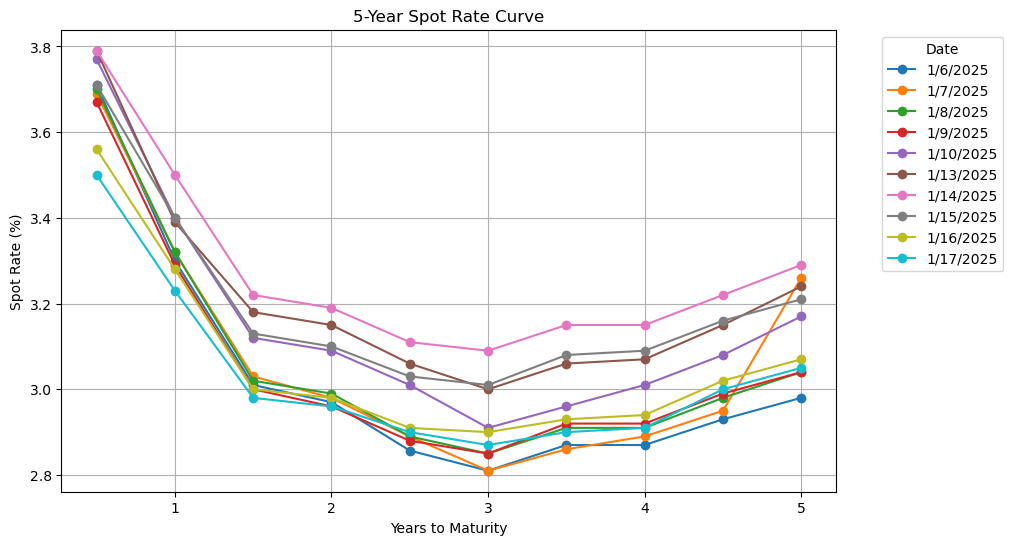

In [144]:
plt.figure(figsize=(10, 6))
for date in spot_rate_dt.columns:
    plt.plot(spot_rate_dt.index, spot_rate_dt[date], marker='o', linestyle='-', label=date)

# Formatting the plot
plt.xlabel("Years to Maturity")
plt.ylabel("Spot Rate (%)")
plt.title("5-Year Spot Rate Curve")
plt.legend(title="Date", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#plt.savefig("4b.png", dpi=300, bbox_inches='tight') 

plt.show()

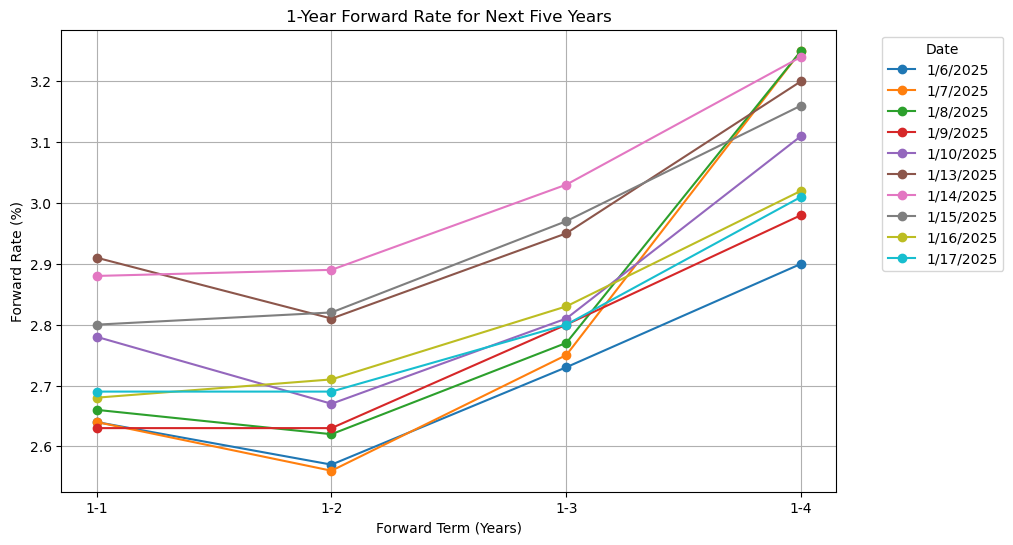

In [146]:
# forward rate data
data = {
    "1-1": [2.64, 2.64, 2.66, 2.63, 2.78, 2.91, 2.88, 2.8, 2.68, 2.69],
    "1-2": [2.57, 2.56, 2.62, 2.63, 2.67, 2.81, 2.89, 2.82, 2.71, 2.69],
    "1-3": [2.73, 2.75, 2.77, 2.8, 2.81, 2.95, 3.03, 2.97, 2.83, 2.8],
    "1-4": [2.9, 3.25, 3.25, 2.98, 3.11, 3.2, 3.24, 3.16, 3.02, 3.01]
}

index = tendays
forward_rates = pd.DataFrame(data, index=index)
forward_rate_dt = forward_rates.T


# plot the forward rate
plt.figure(figsize=(10, 6))

for date in forward_rate_dt.columns:
    plt.plot(forward_rate_dt.index, forward_rate_dt[date], marker='o', linestyle='-', label=date)

plt.xlabel('Forward Term (Years)')
plt.ylabel('Forward Rate (%)')
plt.title('1-Year Forward Rate for Next Five Years')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
#plt.savefig("4c.png", dpi=300, bbox_inches='tight') 
plt.show()

In [142]:
# Log returns 
data = {
    "Date": ["1/6/2025", "1/7/2025", "1/8/2025", "1/9/2025", "1/10/2025",
             "1/13/2025", "1/14/2025", "1/15/2025", "1/16/2025", "1/17/2025"],
    "1Y": [3.331044, 3.351987, 3.351951, 3.320400, 3.425355, 3.414745, 3.530134, 3.425175, 3.309663, 3.257224],
    "2Y": [3.042387, 3.056314, 3.049206, 3.028080, 3.147271, 3.210247, 3.252371, 3.153815, 3.027408, 2.999285],
    "3Y": [2.992459, 3.008275, 3.013488, 2.986886, 3.114205, 3.172461, 3.220320, 3.129704, 3.002155, 2.980680],
    "4Y": [2.884552, 2.913687, 2.921903, 2.905000, 3.034835, 3.093228, 3.139394, 3.063465, 2.937395, 2.924671],
    "5Y": [2.841555, 2.841389, 2.882797, 2.875697, 2.944934, 3.034903, 3.118492, 3.041539, 2.923098, 2.898639],
}

df = pd.DataFrame(data)
df.set_index("Date", inplace=True)
log_returns_ytm = np.log(df / df.shift(1))
log_returns_ytm = log_returns.iloc[1:]
log_returns_ytm = log_returns.round(3)
log_returns_ytm = log_returns.applymap(lambda x: 0.000 if x == -0.000 else x)
log_returns_ytm.index = range(1, 10)


log_returns_ytm

,1Y,2Y,3Y,4Y,5Y
1,0.006,0.005,0.005,0.010,0.000
2,0.000,-0.002,0.002,0.003,0.014
3,-0.009,-0.007,-0.009,-0.006,-0.002
4,0.031,0.039,0.042,0.044,0.024
5,-0.003,0.020,0.019,0.019,0.030
6,0.033,0.013,0.015,0.015,0.027
7,-0.030,-0.031,-0.029,-0.024,-0.025
8,-0.034,-0.041,-0.042,-0.042,-0.040
9,-0.016,-0.009,-0.007,-0.004,-0.008


In [141]:
# YTM covariance matrix
ytm_cov = log_returns.cov()

ytm_cov

,1Y,2Y,3Y,4Y,5Y
1Y,0.000554,0.000513,0.000531,0.000521,0.000481
2Y,0.000513,0.000609,0.000622,0.000613,0.000549
3Y,0.000531,0.000622,0.000639,0.000630,0.000562
4Y,0.000521,0.000613,0.000630,0.000625,0.000545
5Y,0.000481,0.000549,0.000562,0.000545,0.000581


In [127]:
# Data extracted from the forward rate table
forward_rate_data = {
    "Date": ["1/6/2025", "1/7/2025", "1/8/2025", "1/9/2025", "1/10/2025",
             "1/13/2025", "1/14/2025", "1/15/2025", "1/16/2025", "1/17/2025"],
    "1-1": [2.64, 2.64, 2.66, 2.63, 2.78, 2.91, 2.88, 2.80, 2.68, 2.69],
    "1-2": [2.57, 2.56, 2.62, 2.63, 2.67, 2.81, 2.89, 2.82, 2.71, 2.69],
    "1-3": [2.73, 2.75, 2.77, 2.80, 2.81, 2.95, 3.03, 2.97, 2.83, 2.80],
    "1-4": [2.90, 3.25, 3.25, 2.98, 3.11, 3.20, 3.24, 3.16, 3.02, 3.01],
}
df_forward_rates = pd.DataFrame(forward_rate_data)
df_forward_rates.set_index("Date", inplace=True)

# Compute log-returns
log_returns_forward = np.log(df_forward_rates / df_forward_rates.shift(1))
log_returns_forward = log_returns_forward.iloc[1:]
log_returns_forward.index = range(1, 10)

log_returns_forward

,1-1,1-2,1-3,1-4
1,0.000000,-0.003899,0.007299,0.113944
2,0.007547,0.023167,0.007246,0.000000
3,-0.011342,0.003810,0.010772,-0.086732
4,0.055467,0.015095,0.003565,0.042699
5,0.045702,0.051106,0.048621,0.028528
6,-0.010363,0.028072,0.026757,0.012423
7,-0.028171,-0.024520,-0.020001,-0.025001
8,-0.043803,-0.039788,-0.048285,-0.045315
9,0.003724,-0.007407,-0.010657,-0.003317


In [129]:
# Forward rates Covariance matrix
forward_cov = log_returns_forward.cov()
forward_cov

,1-1,1-2,1-3,1-4
1-1,0.001018,0.000666,0.000583,0.000891
1-2,0.000666,0.000775,0.000729,0.000491
1-3,0.000583,0.000729,0.000761,0.000548
1-4,0.000891,0.000491,0.000548,0.003229
